# Practical work 2 : Fourier transform

This practial work is dedicated to the study of the discrete Fourier transform applied on the two following images:
![son.png](./img/son.png)
![sonrot.png](./img/sonrot.png)
and analyze the properties of their spectrum. To this end, we make use of the following functions provided by the module `numpy.fft`:

- `fft2()` to compute the Fourier transform on an image
- `fftshift()` to center the low frequencies
- `abs()` (from `numpy`) to compute the module of a complexe array

In most of cases, high frequencies have lower energy compare to low frequencies. We will use a logarithmic scale by applying $\log(1+abs(TF))$ to display the spectrum.

In [1]:
import utils as ut

In [2]:
import numpy as np
from numpy.fft import fft2,fftshift
from PIL import Image

son = np.array(Image.open('img/son.png')).astype(int)*255
sonrot = np.array(Image.open('img/sonrot.png')).astype(int)


## Exercice: properties of Fourier transform applied on natural images
1. Write the following functions:
 - `computeFT(I)` returning the Fourier transform of image `I`,
 - `toVisualizeFT(If)` returning the centered module of a complex array `If` (the Fourier transform of an image),
 - `toVisualizeLogFT(If)` similar to the previous function but use a logarithmic scale.

In [3]:
def computeFT(I):
    """ Array -> Array[complex] """
    return fft2(I)

def toVisualizeFT(If):
    """ Array[complex] -> Array[float] """
    return fftshift(np.abs(If))

def toVisualizeLogFT(If):
    """ Array[complex] -> Array[float] """
    return np.log(1+np.abs(If))


2. Write a series of instructions that
 - compute the Fourier transform of `son` and `sonrot`,
 - compute and display the module using a logarithmic scale,
 - threshold the module with a parameter of $1.10^5$ (use the function of TME1)
 - display the thresholded spectrum

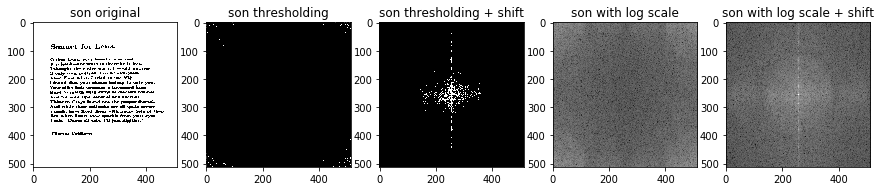

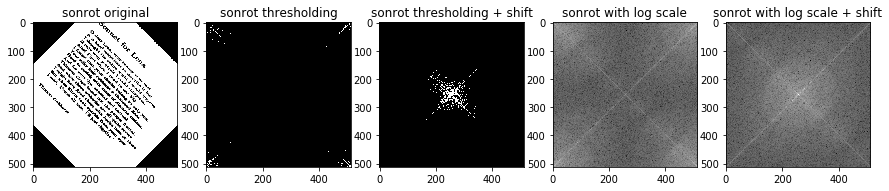

In [4]:
import matplotlib.pyplot as plt
plt.rcParams['image.cmap'] = 'gray'

sonF = computeFT(son)
sonrotF = computeFT(sonrot)

sonF_vis = toVisualizeFT(sonF)
sonrotF_vis = toVisualizeFT(sonrotF)

sonF_log = toVisualizeLogFT(sonF_vis)
sonrotF_log = toVisualizeLogFT(sonrotF_vis)
sonF_th = ut.thresholdImage(sonF,100000)
sonrotF_th = ut.thresholdImage(sonrotF,100000)
sonF_th_shift = ut.thresholdImage(sonF_vis,100000)
sonrotF_th_shift = ut.thresholdImage(sonrotF_vis,100000)
sonF_th_shifted = ut.thresholdImage(sonF_vis,100000)
sonrotF_th_shifted = ut.thresholdImage(sonrotF_vis,100000)

fig , ax = plt.subplots(1,5)
fig.set_figheight(15)
fig.set_figwidth(15)
ax[0].imshow(son)
ax[0].set_title("son original")
ax[1].imshow(sonF_th)
ax[1].set_title("son thresholding")
ax[2].imshow(sonF_th_shift)
ax[2].set_title("son thresholding + shift")
ax[3].imshow(toVisualizeLogFT(sonF))
ax[3].set_title("son with log scale")
ax[4].imshow(sonF_log)
ax[4].set_title("son with log scale + shift")
plt.show()

fig , ax = plt.subplots(1,5)
fig.set_figheight(15)
fig.set_figwidth(15)
ax[0].imshow(sonrot)
ax[0].set_title("sonrot original")
ax[1].imshow(sonrotF_th)
ax[1].set_title("sonrot thresholding")
ax[2].imshow(sonrotF_th_shift)
ax[2].set_title("sonrot thresholding + shift")
ax[3].imshow(toVisualizeLogFT(sonrotF))
ax[3].set_title("sonrot with log scale")
ax[4].imshow(sonrotF_log)
ax[4].set_title("sonrot with log scale + shift")
plt.show()



3. Interpretation: discuss the results obtained on thresholded FT module. What property of the Fourier transform is shown ?

    Apres utilisation de shift pour bien visualiser le spectre on remarque que ca fait une rotation de la meme maniere que sonrot est une rotation de son, avec une petite perte, cette rotation et aussi claire sur la visualition sur le log scale.
    la porprieté est que TF est linéaire.

4. Write the function `blend()` getting two images, one float parameter $\alpha\in[0,1]$, calculating $\alpha I_1+(1-\alpha)I_2$ and returning the result. 

In [5]:
def blend(I1,I2,alpha):
    """ Array**2*float -> Array """
    return alpha * I1 + (1-alpha) * I2

5. Apply the previous function on images `son` and `sonrot` and $\alpha=\frac12$, compute the Fourier transform, threshold the module and visualize the result. 

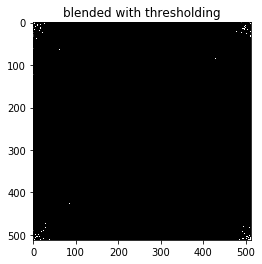

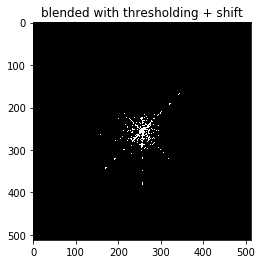

In [6]:
blended = blend(son,sonrot,1/2)
blendedF = computeFT(blended)
blendedF_vis = toVisualizeFT(blendedF)
blendedF_th_shift = ut.thresholdImage(blendedF_vis,100000)
blendedF_th = ut.thresholdImage(blendedF,100000)

plt.imshow(blendedF_th)
plt.title("blended with thresholding")
plt.show()
plt.imshow(blendedF_th_shift)
plt.title("blended with thresholding + shift")
plt.show()

6. Compare the latter result with those of question 2: what property of the Fourier transform is shown? What is the behaviour of $\alpha$ in the resulting spectrum?

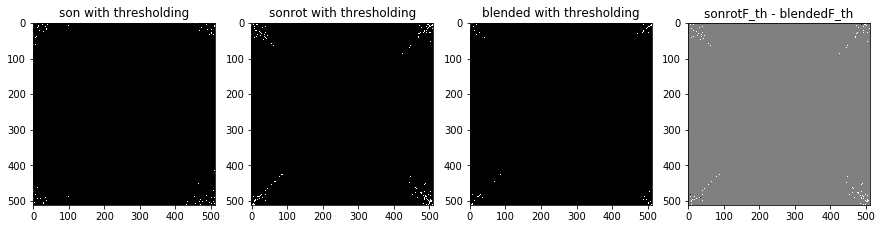

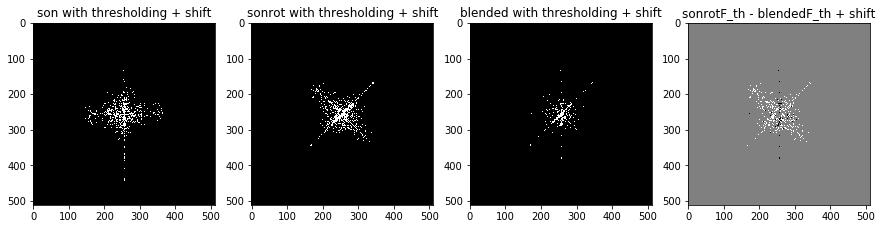

In [7]:
fig , ax = plt.subplots(1,4)
fig.set_figheight(15)
fig.set_figwidth(15)
ax[0].imshow(sonF_th)
ax[0].set_title("son with thresholding")
ax[1].imshow(sonrotF_th)
ax[1].set_title("sonrot with thresholding")
ax[2].imshow(blendedF_th)
ax[2].set_title("blended with thresholding")
ax[3].imshow(sonrotF_th - blendedF_th)
ax[3].set_title("sonrotF_th - blendedF_th")
plt.show()


fig , ax = plt.subplots(1,4)
fig.set_figheight(15)
fig.set_figwidth(15)
ax[0].imshow(sonF_th_shift)
ax[0].set_title("son with thresholding + shift")
ax[1].imshow(sonrotF_th_shift)
ax[1].set_title("sonrot with thresholding + shift")
ax[2].imshow(blendedF_th_shift)
ax[2].set_title("blended with thresholding + shift")
ax[3].imshow(sonrotF_th_shift - blendedF_th_shift)
ax[3].set_title("sonrotF_th - blendedF_th + shift")
plt.show()

    le comportement de alpha est diminuer le spectre comme on voit sur la 3eme image apres seuillage.
    apres comparaison on remarque que blended est la somme des deux spectre affaiblie par alpha ce qui montre que le TF est linéaire. 

7. We want to determine the text orientation in image `sonrot` and produce a new image with horizontal text. Write the function `rectifyOrientation()` that:

 + computes the FT module of image given in parameter and threshold it at $3\times 10^{5}$,
 + from thresholded module determines the main orientation using the function `mainOrientation()` 
 + produces the rectified image applying a rotation with a suitable angle using `rotateImage()`

In [178]:
def mainOrientation(I):
    """ Array -> tuple[Iori,float]
        return image of orientation (32 bins) and the main orientation (degree) from a Fourier transform module
    """
    n, m = I.shape

    size = 32
    x = np.array(range(size))
    ori = np.vstack((np.cos(np.pi*x/size), np.sin(np.pi*x/size))).T

    Iori = np.zeros((n, m))
    orients = np.zeros((size))

    for i in range(1,n+1):
        for j in range(1,m+1):
            if I[i-1, j-1] > 0:
                v = np.array([j-m/2, -i + n/2])
                if i > n/2:
                    v = -v
                    prod = np.matmul(ori, v)
                    maxi = prod.max()
                    if maxi > 0:
                        imax = np.nonzero(prod == maxi)
                        Iori[i-1, j-1] = imax[0]
                        orients[imax] += 1

    maxori = np.nonzero(orients == orients.max())[0][0]
    return (Iori, 180*maxori/size - 90)

def rotateImage(I,a):
    """ Array*float -> Array 
        return a rotation of angle a (degree) of image I
    """
    return np.array(Image.fromarray(I).rotate(a, expand=True, fillcolor=127))

####### your code below

def rectifyOrientation(I):
    I_FT = computeFT(I)
    I_FT_th = toVisualizeFT(ut.thresholdImage(I_FT,30000))
    
    Iori, degree = mainOrientation(I_FT_th)
    return rotateImage(I,-degree)

8. Experiment `rectifyOrientation()` on `sinrot`, and on a rotation of `img/port.jpg` (using `rotateImage()`) with various rotation angles.  

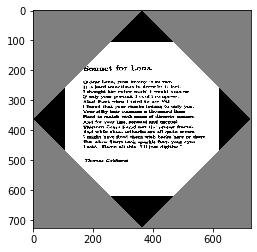

In [179]:
sonrot_fixed = rectifyOrientation(sonrot)
plt.imshow(sonrot_fixed)
plt.show()

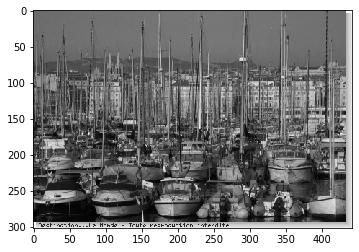

In [180]:
port = np.array(Image.open('img/port.jpg'))
plt.imshow(port)
plt.show()

In [176]:
def testAllAngles(I):
    x = [ r for r in range(0, 360 ,5)]
    y = [ mainOrientation(toVisualizeFT(ut.thresholdImage(computeFT(rotateImage(I,r)),30000)))[1] for r in range(0, 360 ,5) ]
    plt.scatter(x,y)
    plt.show()

    test avec "port.jpg" :

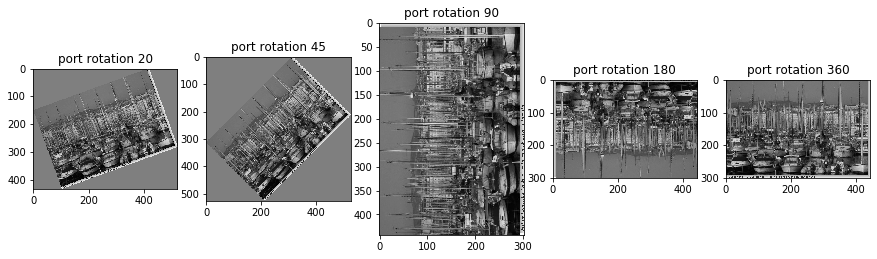

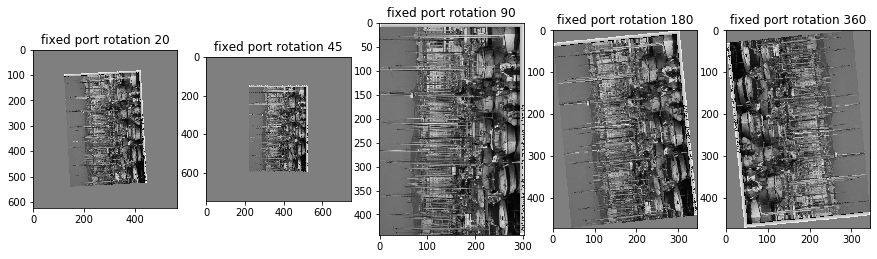

In [187]:
port_rot_20 = rotateImage(port,20)
port_rot_45 = rotateImage(port,45)
port_rot_90 = rotateImage(port,90)
port_rot_180 = rotateImage(port,180)
port_rot_360 = rotateImage(port,360)


fig , ax = plt.subplots(1,5)
fig.set_figheight(15)
fig.set_figwidth(15)
ax[0].imshow(port_rot_20)
ax[0].set_title("port rotation 20")
ax[1].imshow(port_rot_45)
ax[1].set_title("port rotation 45")
ax[2].imshow(port_rot_90)
ax[2].set_title("port rotation 90")
ax[3].imshow(port_rot_180)
ax[3].set_title("port rotation 180")
ax[4].imshow(port_rot_360)
ax[4].set_title("port rotation 360")
plt.show()





fixed_port_rot_20 = rectifyOrientation(port_rot_20)
fixed_port_rot_45 = rectifyOrientation(port_rot_45)
fixed_port_rot_90 = rectifyOrientation(port_rot_90)
fixed_port_rot_180 = rectifyOrientation(port_rot_180)
fixed_port_rot_360 = rectifyOrientation(port_rot_360)


fig , ax = plt.subplots(1,5)
fig.set_figheight(15)
fig.set_figwidth(15)
ax[0].imshow(fixed_port_rot_20)
ax[0].set_title("fixed port rotation 20")
ax[1].imshow(fixed_port_rot_45)
ax[1].set_title("fixed port rotation 45")
ax[2].imshow(fixed_port_rot_90)
ax[2].set_title("fixed port rotation 90")
ax[3].imshow(fixed_port_rot_180)
ax[3].set_title("fixed port rotation 180")
ax[4].imshow(fixed_port_rot_360)
ax[4].set_title("fixed port rotation 360")
plt.show()







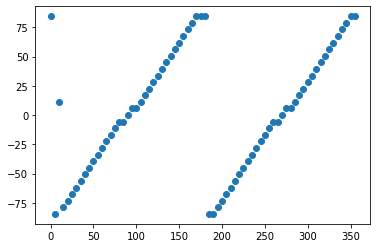

In [183]:
testAllAngles(port)

    d'apres les tests ci-dessus on remarque que la rectification des rotation se fait plus ou moins correctement avec un decalage de -90 ° entre 0 et 180, et un decalage de +90 ° entre 0 et 180. 

    test avec "son.png" :

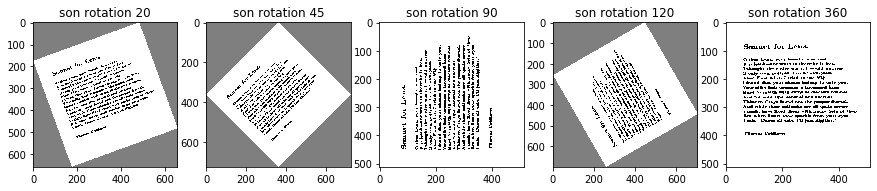

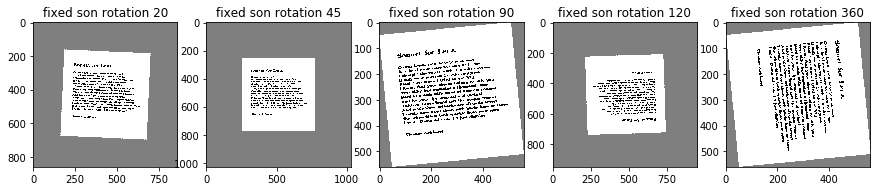

In [207]:
son_rot_20 = rotateImage(son,20)
son_rot_45 = rotateImage(son,45)
son_rot_90 = rotateImage(son,90)
son_rot_120 = rotateImage(son,120)
son_rot_360 = rotateImage(son,360)


fig , ax = plt.subplots(1,5)
fig.set_figheight(15)
fig.set_figwidth(15)
ax[0].imshow(son_rot_20)
ax[0].set_title("son rotation 20")
ax[1].imshow(son_rot_45)
ax[1].set_title("son rotation 45")
ax[2].imshow(son_rot_90)
ax[2].set_title("son rotation 90")
ax[3].imshow(son_rot_120)
ax[3].set_title("son rotation 120")
ax[4].imshow(son_rot_360)
ax[4].set_title("son rotation 360")
plt.show()





fixed_son_rot_20 = rectifyOrientation(son_rot_20)
fixed_son_rot_45 = rectifyOrientation(son_rot_45)
fixed_son_rot_90 = rectifyOrientation(son_rot_90)
fixed_son_rot_120 = rectifyOrientation(son_rot_120)
fixed_son_rot_360 = rectifyOrientation(son_rot_360)


fig , ax = plt.subplots(1,5)
fig.set_figheight(15)
fig.set_figwidth(15)
ax[0].imshow(fixed_son_rot_20)
ax[0].set_title("fixed son rotation 20")
ax[1].imshow(fixed_son_rot_45)
ax[1].set_title("fixed son rotation 45")
ax[2].imshow(fixed_son_rot_90)
ax[2].set_title("fixed son rotation 90")
ax[3].imshow(fixed_son_rot_120)
ax[3].set_title("fixed son rotation 120")
ax[4].imshow(fixed_son_rot_360)
ax[4].set_title("fixed son rotation 360")
plt.show()







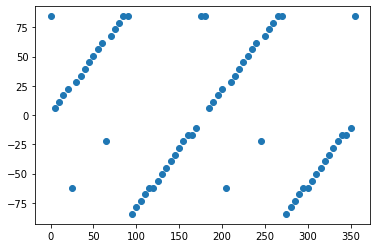

In [177]:
testAllAngles(son)

    d'apres les tests ci-dessus on remarque que la rectification des rotation se fait plus ou moins correctement entre 0 et 100 et entre 270 et 350 , par contre avec un decalage de +180 ° entre 100 et 270 et avec un decalage de +90 ° entre 350 et 360 .

## Conclusion : 

    l'algorithme marche mieux avec des images de shape n*n que n*m comme le spectre generée par se dernier contient une ligne plus longue centré, comme on remarque sur les testes sur "port.jpg" les images rectifié sont orienté de facon a mettre l axe le plus long comme ordonné, d'autre par pour le cas de n*n ce n'est pas le cas.
    les decalges de 90° et 180° sont des problemes qu'on doit gerer sur l'agorithme mainOrientation.